## Ejercicio 5

In [1]:
!pip install pandas-datareader
!pip install pmdarima

In [2]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from scipy import stats
from pandas_datareader import data

import statsmodels.api as sm
import pmdarima as pmd
from statsmodels.tsa.api import VAR
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

from sklearn.linear_model import Ridge, Lasso, ElasticNet, ElasticNetCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    mean_absolute_percentage_error,
)

In [3]:
# Variables diarias
url_base  = 'https://estadisticas.bcrp.gob.pe/estadisticas/series/api/'
cod_var   = ['PD04692MD','PD31893DD','PD04637PD', 'PD04638PD', 'PD04647PD',
             'PD04648PD', 'PD38026MD', 'PD38027MD', 'PD04696MD', 'PD04701XD',
             'PD04702XD', 'PD04703XD', 'PD04704XD', 'PD04705XD', 'PD04718XD',
             'PD04719XD', 'PD04720XD', 'PD04709XD', 'PD04708XD', 'PD04721XD']
form_out  = '/json'
period    = '/2023-12-21/2024-12-20'

month_s = ['Ene','Feb','Mar','Abr','May','Jun','Jul','Ago','Set','Oct','Nov','Dic']
month_d = ['01','02','03','04','05','06','07','08','09','10','11','12']

df1 = pd.DataFrame()

for j in cod_var:
    url_aux   = url_base + j + form_out + period
    resp      = requests.get(url_aux)
    resp_json = resp.json()
    periods   = resp_json['periods']

    value = []
    dates = []

    for i in periods:
        aux_dat = i['name']
        aux_val = i['values']
        dates.append(aux_dat)
        value.append(aux_val[0])

    dict_aux = {'Fecha' : dates,
                 resp_json['config']['series'][0]['name'] : value}
    df_aux = pd.DataFrame(dict_aux)

    df_aux['Fecha'] = df_aux['Fecha'].str.replace('.','-')
    for (s,d) in zip(month_s,month_d):
        df_aux['Fecha'] = df_aux['Fecha'].str.replace(s,d)
    df_aux['Fecha'] = pd.to_datetime(df_aux['Fecha'])


    df_aux.set_index(df_aux['Fecha'], inplace=True)
    df_aux = df_aux.drop(columns=['Fecha'])
    df1    = pd.concat([df1, df_aux], axis=1)

display(df1.head())

,"Tasas de interés - Interbancaria, S/",Tasas de interés - Rendimiento del Bono del gobierno peruano a 10 años (en S/),Tipo de cambio - TC Interbancario (S/ por US$) - Compra,Tipo de cambio - TC Interbancario (S/ por US$) - Venta,Tipo de cambio - TC Euro (S/ por Euro) - Compra,Tipo de cambio - TC Euro (S/ por Euro) - Venta,Indicadores bursátiles - Índice General Bursátil BVL (índice),Indicadores bursátiles - Índice Selectivo Bursátil BVL (índice),Indicadores bursátiles - Monto negociado en acciones (millones S/) - Promedio diario,"Cotizaciones internacionales - Cobre (Londres, cUS$ por libras)","Cotizaciones internacionales - Plata (H.Harman, US$ por onzas troy)","Cotizaciones internacionales - Zinc (Londres, cUS$ por libras)","Cotizaciones internacionales - Oro (Londres, US$ por onzas troy)","Cotizaciones internacionales - Petróleo (West Texas Intermediate, US$ por barriles)",Tasas de interés internacionales - Bonos del Tesoro EE.UU. - 5 años (%),Tasas de interés internacionales - Bonos del Tesoro EE.UU. - 10 años (%),Tasas de interés internacionales - Bonos del Tesoro EE.UU. - 30 años (%),Tasas de interés: EMBIG (variación en pbs) - Spread - EMBIG Perú (pbs),Tasas de interés: EMBIG (variación en pbs) - Spread - EMBIG America Latina (pbs),Bolsas (índices) - Dow Jones (var%)
Fecha,,,,,,,,,,,,,,,,,,,,
2023-12-21,6.75,6.8,3.7,3.70466666666667,3.784,4.315,25627.66,32469.58,34.40319362,383.739148823023,24.36,115.824811671555,2045.95,73.59,3.876,3.889,4.032,161,383,0.869289682325647
2023-12-22,6.75,6.8,3.68183333333333,3.68483333333333,3.703,4.276,25683.02,32543.17,26.10857042,385.508159083555,24.25,116.845394503985,2053.08,73.26,3.873,3.896,4.051,159,382,-0.0491386697001772
2023-12-25,n.d.,n.d.,n.d.,n.d.,n.d.,n.d.,n.d.,n.d.,n.d.,385.508159083555,24.25,116.845394503985,2053.08,73.26,3.873,3.896,4.051,159,382,0
2023-12-26,6.75,6.79,3.68266666666667,3.68683333333333,3.724,4.374,25812.58,32614.16,24.98712993,385.508159083555,24.25,116.845394503985,2067.81,75.57,3.889,3.898,4.046,160,383,0.426256159730509
2023-12-27,6.75,6.68,3.68766666666667,3.69083333333333,3.772,4.341,25879.52,32707.82,48.16002229,386.075149551674,24.25,118.183491995393,2077.49,74.11,3.796,3.795,3.954,167,389,0.296148682139674


In [4]:
# borrar NaN y redondear la data para q se vea mejor en el gráfico

df1.replace(['n.d.'], np.nan, inplace=True)
df1.dropna(inplace=True)

df1 = df1.astype(float)
df1 = df1.round(2)

df1.head()

,"Tasas de interés - Interbancaria, S/",Tasas de interés - Rendimiento del Bono del gobierno peruano a 10 años (en S/),Tipo de cambio - TC Interbancario (S/ por US$) - Compra,Tipo de cambio - TC Interbancario (S/ por US$) - Venta,Tipo de cambio - TC Euro (S/ por Euro) - Compra,Tipo de cambio - TC Euro (S/ por Euro) - Venta,Indicadores bursátiles - Índice General Bursátil BVL (índice),Indicadores bursátiles - Índice Selectivo Bursátil BVL (índice),Indicadores bursátiles - Monto negociado en acciones (millones S/) - Promedio diario,"Cotizaciones internacionales - Cobre (Londres, cUS$ por libras)","Cotizaciones internacionales - Plata (H.Harman, US$ por onzas troy)","Cotizaciones internacionales - Zinc (Londres, cUS$ por libras)","Cotizaciones internacionales - Oro (Londres, US$ por onzas troy)","Cotizaciones internacionales - Petróleo (West Texas Intermediate, US$ por barriles)",Tasas de interés internacionales - Bonos del Tesoro EE.UU. - 5 años (%),Tasas de interés internacionales - Bonos del Tesoro EE.UU. - 10 años (%),Tasas de interés internacionales - Bonos del Tesoro EE.UU. - 30 años (%),Tasas de interés: EMBIG (variación en pbs) - Spread - EMBIG Perú (pbs),Tasas de interés: EMBIG (variación en pbs) - Spread - EMBIG America Latina (pbs),Bolsas (índices) - Dow Jones (var%)
Fecha,,,,,,,,,,,,,,,,,,,,
2023-12-21,6.75,6.80,3.70,3.70,3.78,4.32,25627.66,32469.58,34.40,383.74,24.36,115.82,2045.95,73.59,3.88,3.89,4.03,161.0,383.0,0.87
2023-12-22,6.75,6.80,3.68,3.68,3.70,4.28,25683.02,32543.17,26.11,385.51,24.25,116.85,2053.08,73.26,3.87,3.90,4.05,159.0,382.0,-0.05
2023-12-26,6.75,6.79,3.68,3.69,3.72,4.37,25812.58,32614.16,24.99,385.51,24.25,116.85,2067.81,75.57,3.89,3.90,4.05,160.0,383.0,0.43
2023-12-27,6.75,6.68,3.69,3.69,3.77,4.34,25879.52,32707.82,48.16,386.08,24.25,118.18,2077.49,74.11,3.80,3.80,3.95,167.0,389.0,0.30
2023-12-28,6.75,6.66,3.70,3.70,4.07,4.34,25851.68,32727.97,61.12,386.91,24.25,118.84,2065.61,71.77,3.84,3.84,4.00,162.0,385.0,0.14


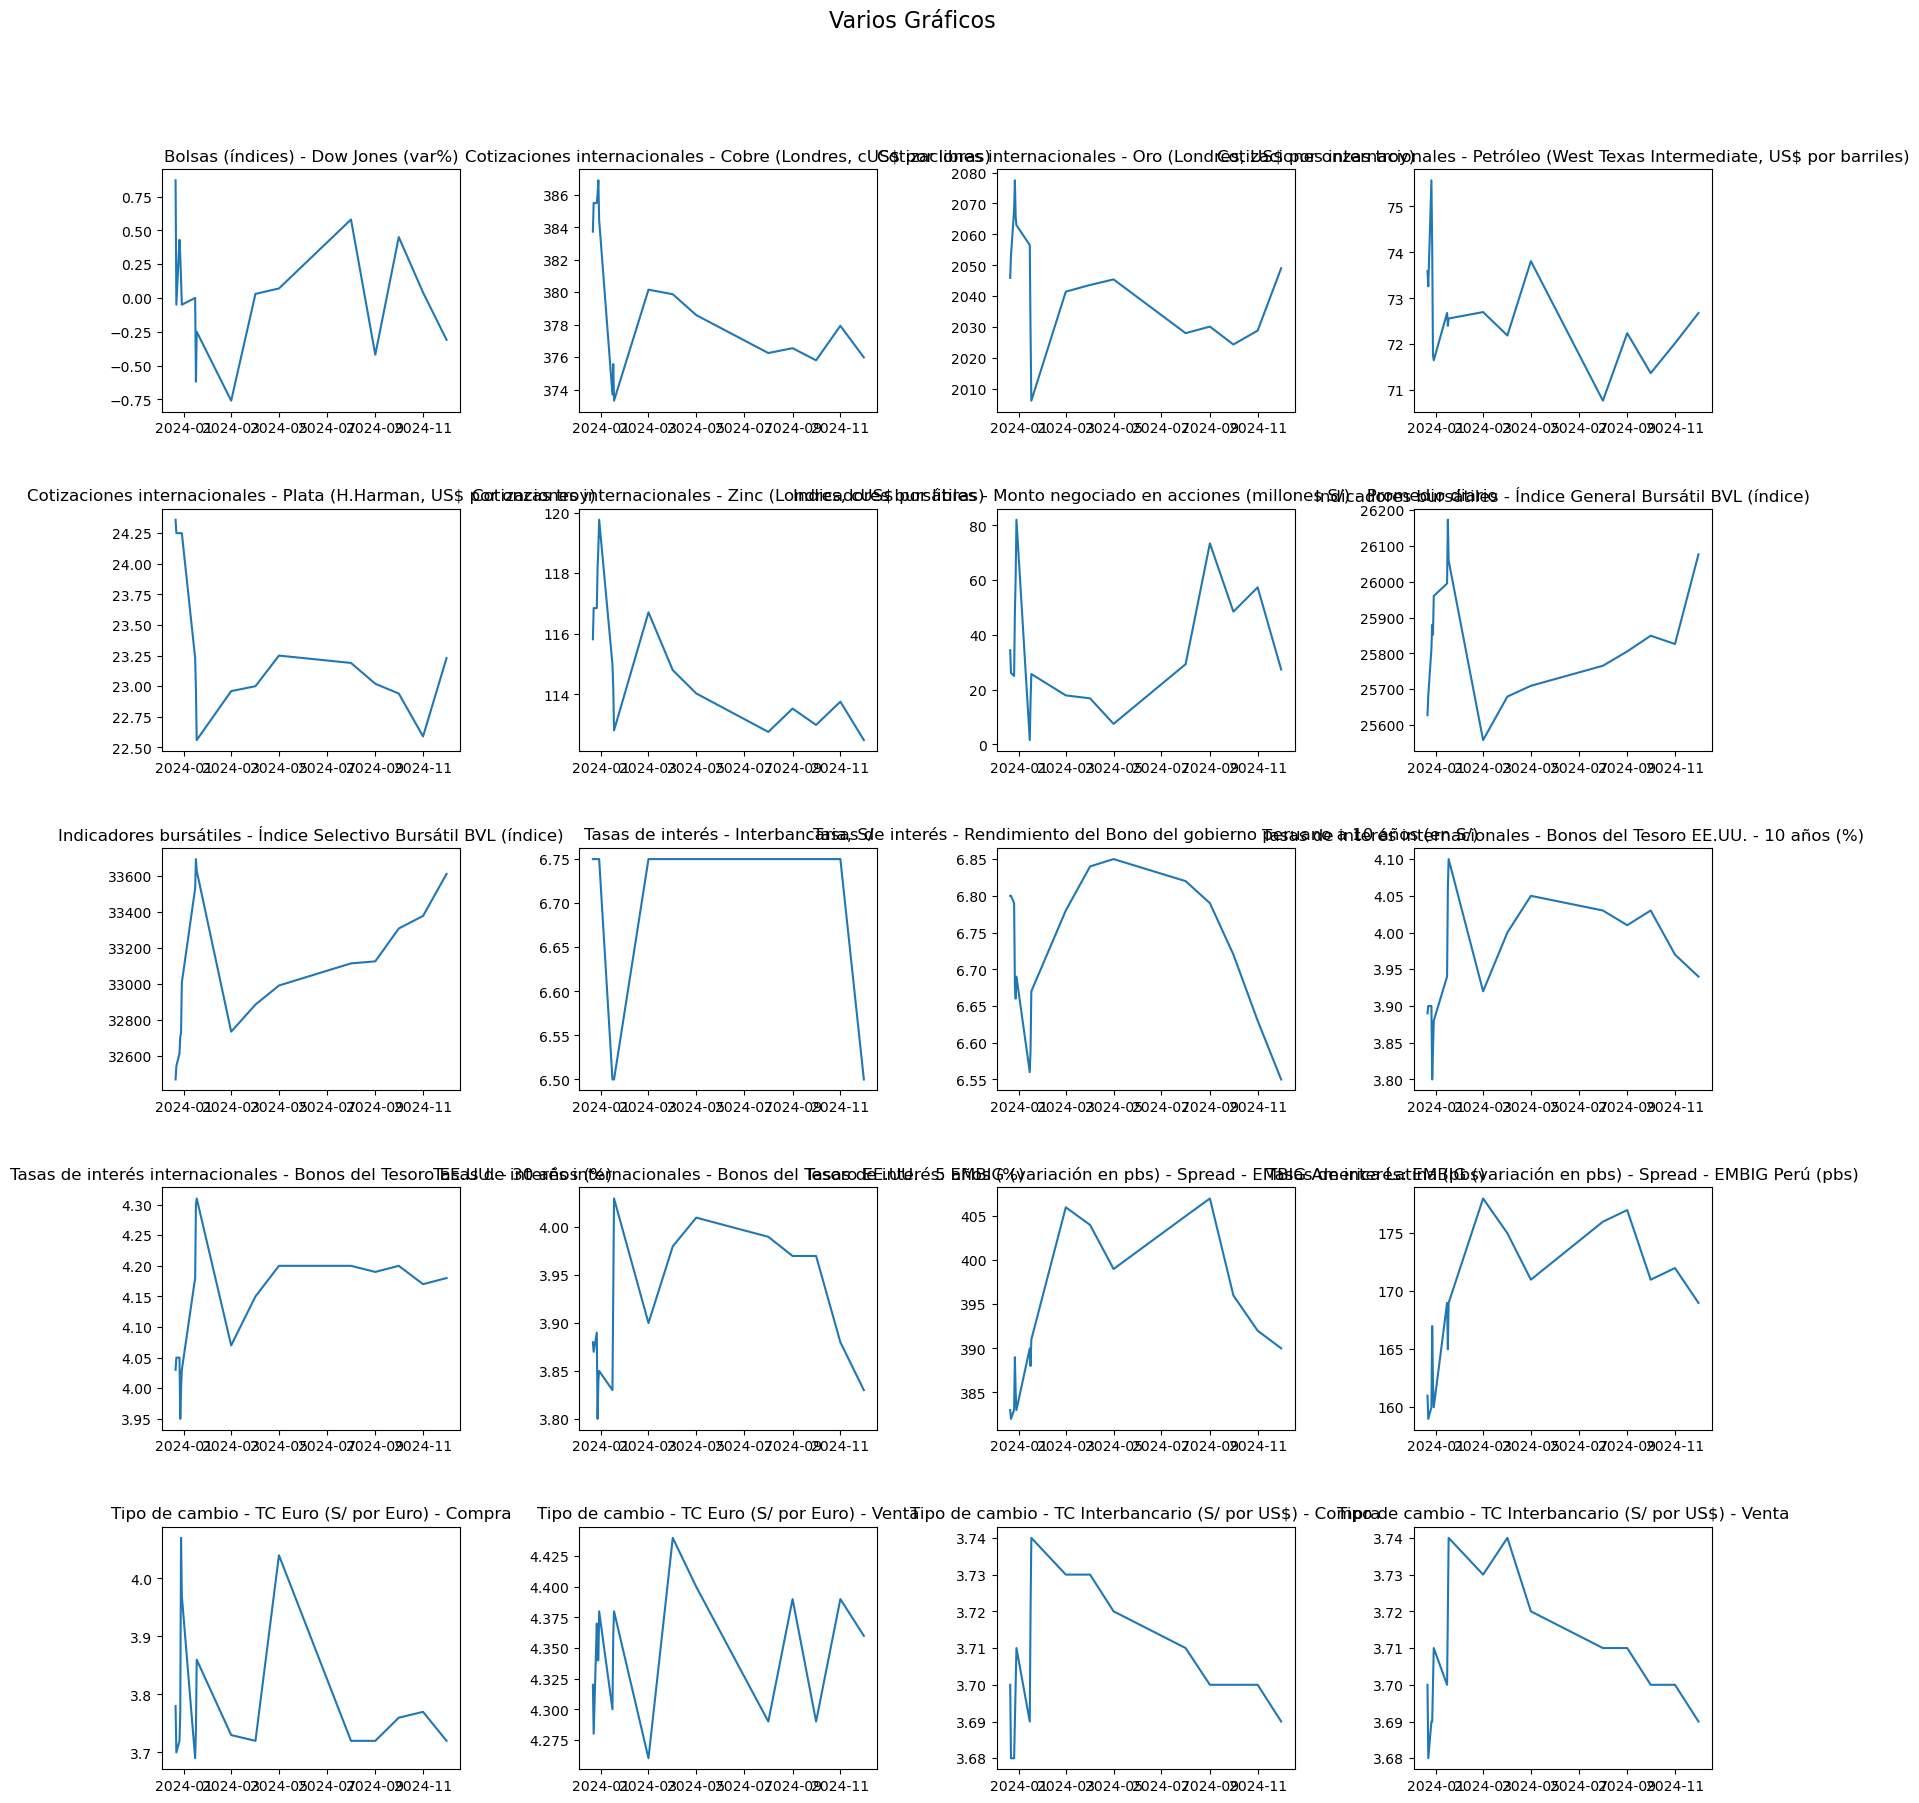

In [5]:
plt.rcParams["figure.figsize"] = (20, 20)

fig, axs = plt.subplots(5, 4)
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

# Obtener todas las columnas excepto 'fecha'
columns = df1.columns.difference(['fecha'])

# Iterar sobre columnas (excluyendo 'fecha')
for idx, i in enumerate(columns):
    a = idx // axs.shape[1]  # índice de fila
    b = idx % axs.shape[1]   # índice de columna

    axs[a, b].set_title(i)
    axs[a, b].plot(df1[i])  # Corregir la función plot aquí

# Título superior del gráfico principal
fig.suptitle('Varios Gráficos', fontsize=16)
plt.show()

In [6]:
# Variables mensuales
url_base  = 'https://estadisticas.bcrp.gob.pe/estadisticas/series/api/'
cod_var   = ['RD38111BM','RD38136BM','PN00480MM', 'PN00492MM', 'PN07782EM',
             'PN00136MM', 'PN00143MM', 'PN01364PM', 'PN01276PM', 'PN09816PM',
             'PN01278PM', 'PN09817PM', 'PN01286PM', 'PD12912AM', 'PD38048AM',
             'PD38049AM', 'PN01770AM', 'PN01728AM']
form_out  = '/json'
period    = '/1993-12/2023-11'

month_s = ['Ene','Feb','Mar','Abr','May','Jun','Jul','Ago','Set','Oct','Nov','Dic']
month_d = ['01','02','03','04','05','06','07','08','09','10','11','12']

df2 = pd.DataFrame()

for j in cod_var:
    url_aux   = url_base + j + form_out + period
    resp      = requests.get(url_aux)
    resp_json = resp.json()
    periods   = resp_json['periods']

    value = []
    dates = []

    for i in periods:
        aux_dat = i['name']
        aux_val = i['values']
        dates.append(aux_dat)
        value.append(aux_val[0])

    dict_aux = {'Fecha' : dates,
                 resp_json['config']['series'][0]['name'] : value}
    df_aux = pd.DataFrame(dict_aux)

    df_aux['Fecha'] = df_aux['Fecha'].str.replace('.','-')
    for (s,d) in zip(month_s,month_d):
        df_aux['Fecha'] = df_aux['Fecha'].str.replace(s,d)
    df_aux['Fecha'] = pd.to_datetime(df_aux['Fecha'])


    df_aux.set_index(df_aux['Fecha'], inplace=True)
    df_aux = df_aux.drop(columns=['Fecha'])
    df2    = pd.concat([df2, df_aux], axis=1)

display(df2.head())

,Exportaciones por Departamento (Valores FOB en millones de US$) - Total,Importaciones por Aduana (Valores FOB en millones de US$) - Total,Emisión primaria y multiplicador (millones S/) - Circulante,Emisión primaria y multiplicador (millones S/) - Preferencia por Circulante,Indicadores de las empresas bancarias - Utilidad acumulada - Empresas Bancarias (millones S/),Liquidez de las empresas bancarias - Liquidez - MN (millones S/),Liquidez de las empresas bancarias - Coeficiente de Dolarización de la Liquidez (%),Índice de precios al consumidor Lima Metropolitana: clasificación transables - no transables (variación porcentual) - Índice de Precios al Consumidor,Índice de precios Lima Metropolitana (var% mensual) - IPC Sin Alimentos y Energía,Índice de precios Lima Metropolitana (var% mensual) - IPC Alimentos y Energía,Índice de precios Lima Metropolitana (var% mensual) - IPC Subyacente,Índice de precios Lima Metropolitana (var% mensual) - IPC No Subyacente,Índice de precios Lima Metropolitana (var% mensual) - Índice de Precios al por Mayor,Expectativas macroeconómicas - Expectativa de Inflación a 12 meses,Expectativas macroeconómicas - Expectativa de PBI a 12 meses,Expectativas macroeconómicas - Expectativa de TC a 12 meses,Producto bruto interno y demanda interna (índice 2007=100) - PBI,Producto bruto interno y demanda interna (variaciones porcentuales anualizadas) - PBI
Fecha,,,,,,,,,,,,,,,,,,
1993-12-01,NaN,NaN,1587,42.5229763403982,NaN,1911.201,80.6586881098204,2.51231337910364,4.33706585552396,1.12026052029056,1.83787239367491,3.58546522474483,1.17256637168136,NaN,NaN,NaN,NaN,NaN
1994-01-01,NaN,NaN,1398.7,38.2106269635296,NaN,2062.179,80.4234260690323,1.83702370579953,2.46906182325671,1.34035672844333,1.57491378446306,2.24552576641819,0.540982515521107,NaN,NaN,NaN,NaN,NaN
1994-02-01,NaN,NaN,1462.6,36.4301174899933,NaN,2362.933,78.599891078325,1.82069274880277,2.42851161066314,1.33732332097528,2.10838872570966,1.37453926101283,0.448235427620436,NaN,NaN,NaN,NaN,NaN
1994-03-01,NaN,NaN,1605.5,37.7967474315633,NaN,2457.768,77.881268156395,2.32443084440025,1.99084118632073,2.5924388961007,1.71597739191223,3.27351552728612,1.03650844457832,NaN,NaN,NaN,NaN,NaN
1994-04-01,NaN,NaN,1619,37.7764400080266,NaN,2486.605,78.0190380884407,1.54494696586015,1.71759932520732,1.40636036046459,1.95091645414871,0.9210809250741,1.02214809500297,NaN,NaN,NaN,NaN,NaN


In [7]:
# borrar NaN y redondear la data para q se vea mejor en el gráfico

df2.replace(['n.d.'], np.nan, inplace=True)
df2.dropna(inplace=True)

df2 = df2.astype(float)
df2 = df2.round(2)

df2

,Exportaciones por Departamento (Valores FOB en millones de US$) - Total,Importaciones por Aduana (Valores FOB en millones de US$) - Total,Emisión primaria y multiplicador (millones S/) - Circulante,Emisión primaria y multiplicador (millones S/) - Preferencia por Circulante,Indicadores de las empresas bancarias - Utilidad acumulada - Empresas Bancarias (millones S/),Liquidez de las empresas bancarias - Liquidez - MN (millones S/),Liquidez de las empresas bancarias - Coeficiente de Dolarización de la Liquidez (%),Índice de precios al consumidor Lima Metropolitana: clasificación transables - no transables (variación porcentual) - Índice de Precios al Consumidor,Índice de precios Lima Metropolitana (var% mensual) - IPC Sin Alimentos y Energía,Índice de precios Lima Metropolitana (var% mensual) - IPC Alimentos y Energía,Índice de precios Lima Metropolitana (var% mensual) - IPC Subyacente,Índice de precios Lima Metropolitana (var% mensual) - IPC No Subyacente,Índice de precios Lima Metropolitana (var% mensual) - Índice de Precios al por Mayor,Expectativas macroeconómicas - Expectativa de Inflación a 12 meses,Expectativas macroeconómicas - Expectativa de PBI a 12 meses,Expectativas macroeconómicas - Expectativa de TC a 12 meses,Producto bruto interno y demanda interna (índice 2007=100) - PBI,Producto bruto interno y demanda interna (variaciones porcentuales anualizadas) - PBI
Fecha,,,,,,,,,,,,,,,,,,
2006-12-01,2571.92,1425.49,11687.57,35.06,1713.48,19851.35,64.64,0.03,0.27,-0.18,0.15,-0.16,0.19,2.15,6.30,3.25,99.42,8.60
2007-01-01,1747.21,1438.08,10902.87,32.59,201.32,21232.03,63.05,0.01,-0.17,0.13,0.10,-0.10,-0.34,1.96,6.60,3.22,89.95,5.01
2007-02-01,1907.61,1365.38,11117.63,33.02,349.48,21090.63,63.39,0.26,0.17,0.38,0.26,0.26,-0.48,1.92,6.69,3.20,88.67,4.77
2007-03-01,2099.80,1404.76,11219.60,32.22,558.55,21964.93,62.27,0.35,0.24,0.39,0.33,0.38,0.41,1.85,6.90,3.19,96.72,6.02
2007-04-01,2120.28,1471.97,11600.44,33.91,763.92,20662.49,64.23,0.18,0.15,0.24,0.13,0.24,0.30,1.90,6.80,3.19,96.64,5.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-01,3657.16,2768.43,66840.54,22.22,2297.37,190358.97,38.39,-0.11,0.11,-0.37,0.14,-0.61,0.34,1.57,1.00,3.46,156.90,-9.09
2020-09-01,4331.01,2972.44,66412.12,22.05,2316.37,191378.83,38.53,0.14,0.05,0.24,0.07,0.26,0.12,1.49,2.81,3.46,162.40,-5.79
2020-10-01,4675.68,3240.93,67687.31,22.38,2271.70,190265.95,39.10,0.02,0.08,-0.06,0.16,-0.26,0.25,1.62,5.33,3.48,170.67,-3.17


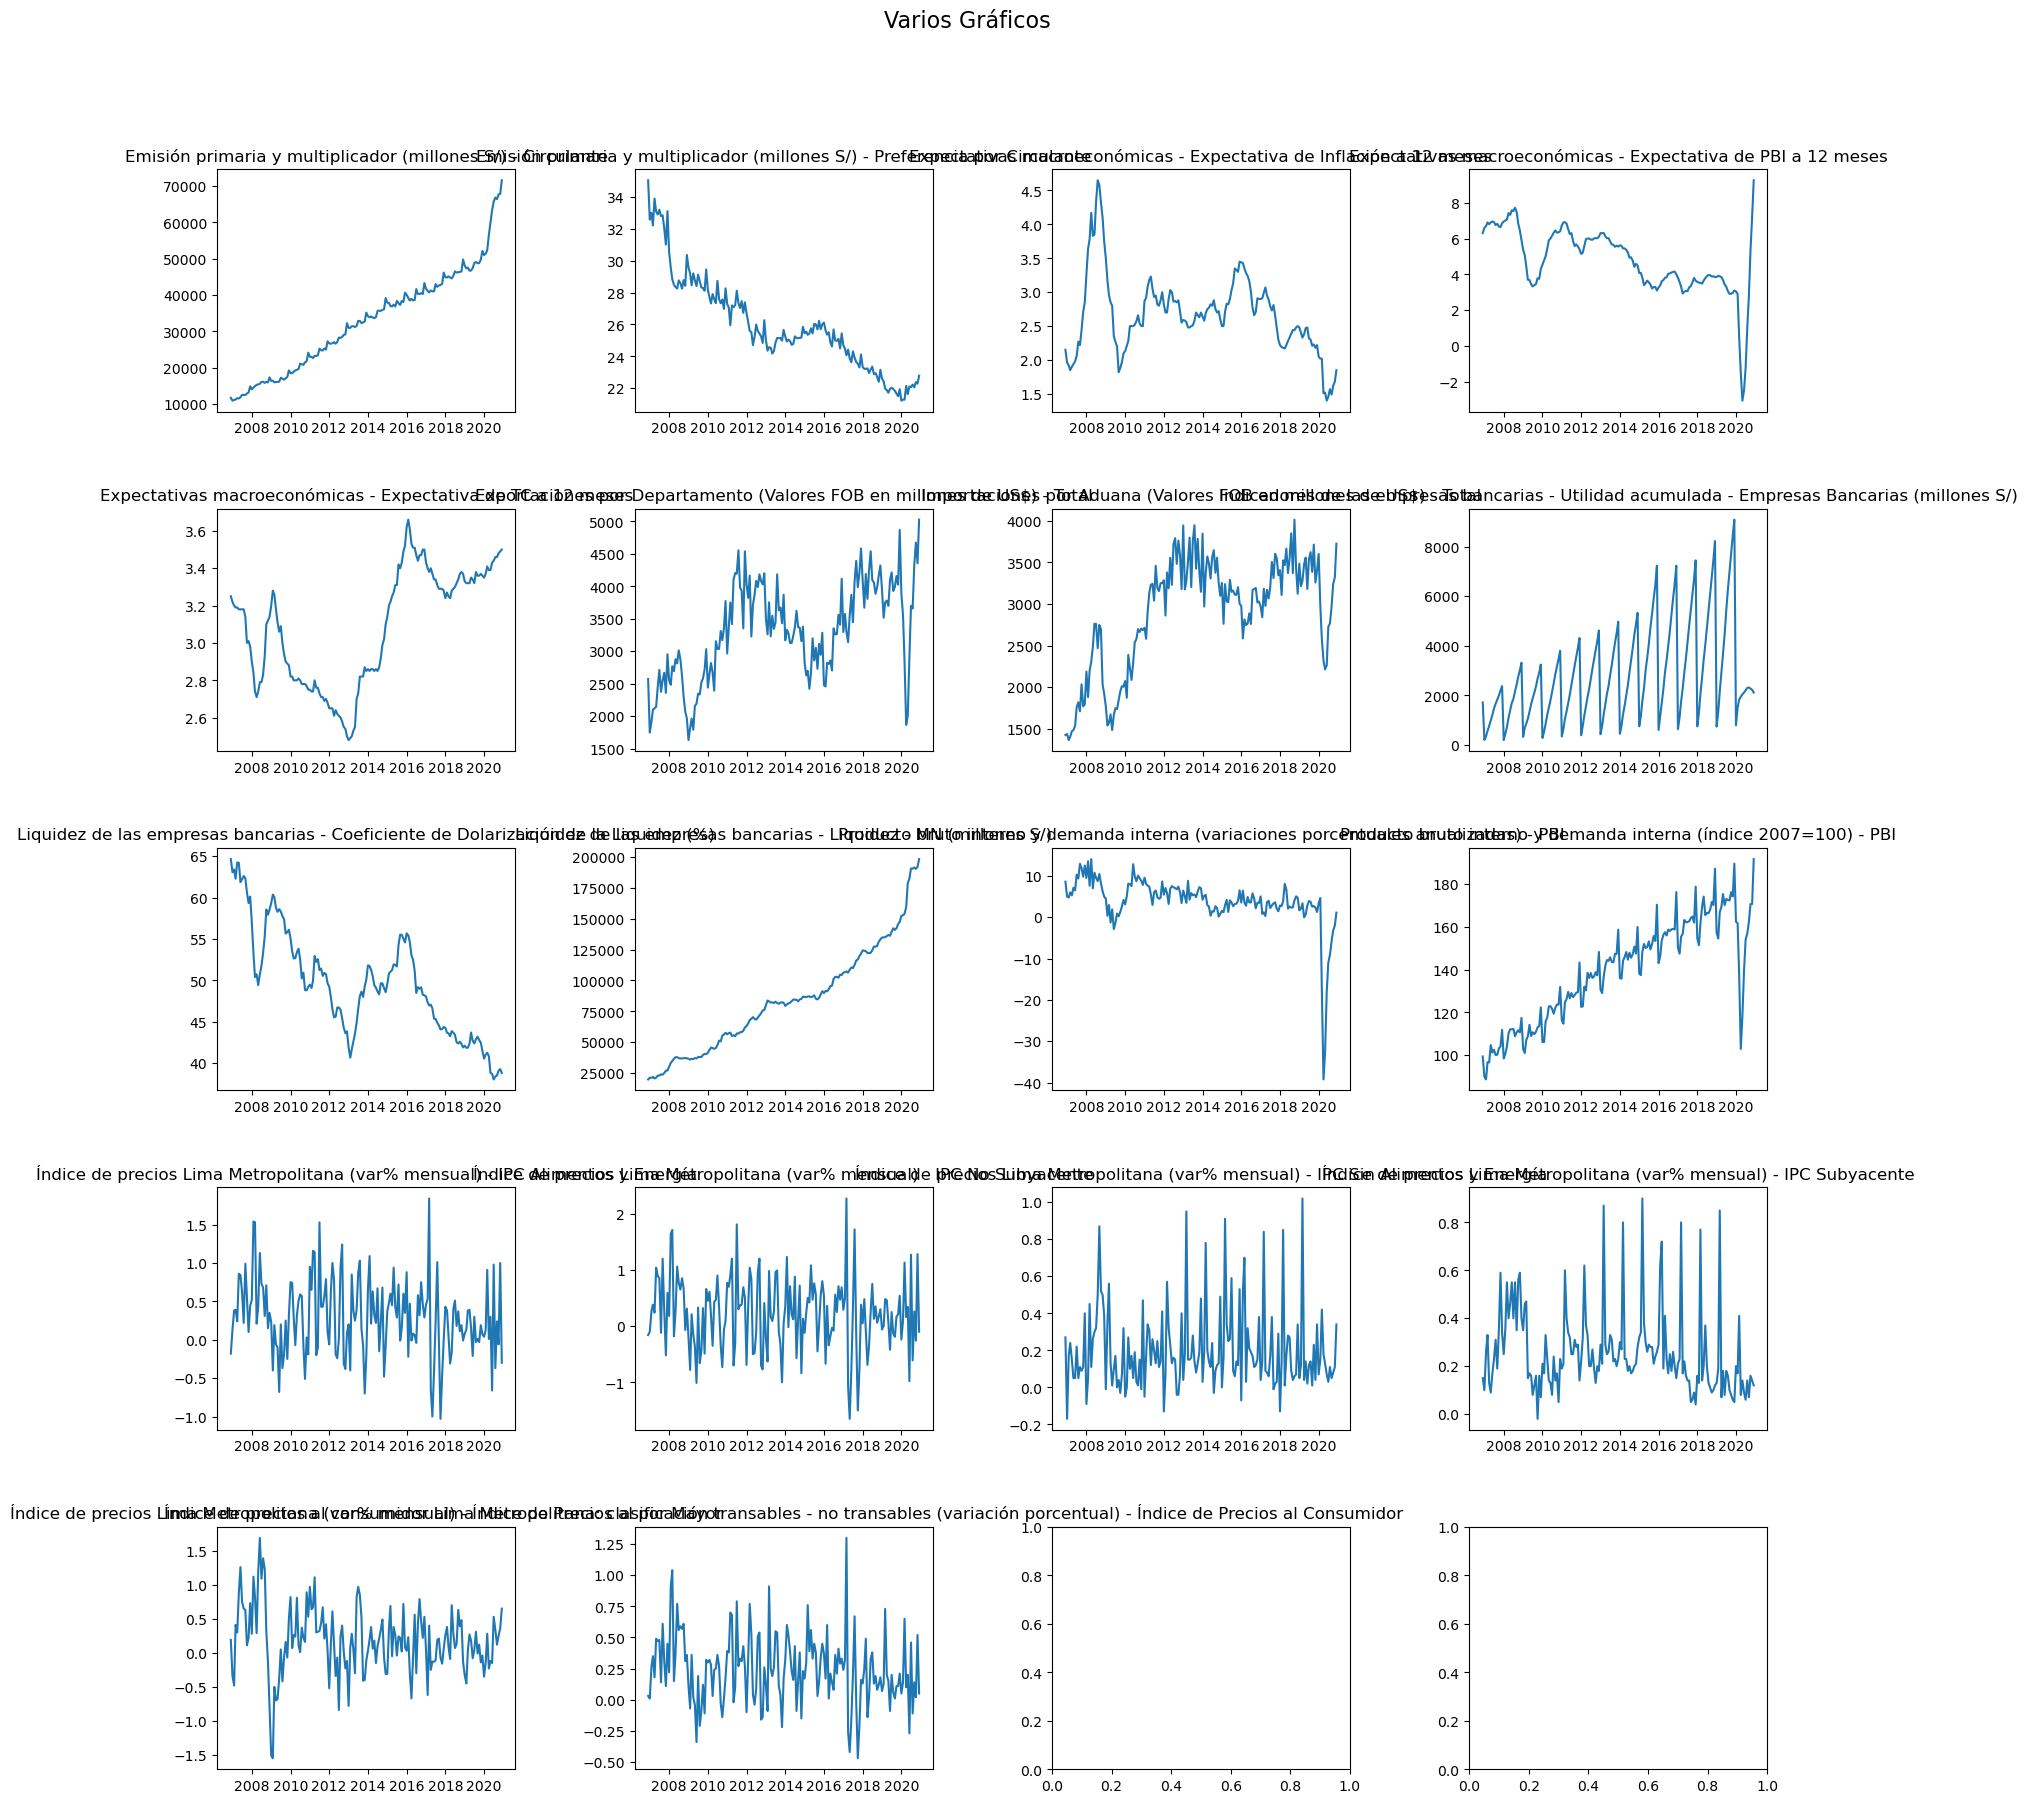

In [8]:
plt.rcParams["figure.figsize"] = (20, 20)

fig, axs = plt.subplots(5, 4)
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

# Obtener todas las columnas excepto 'fecha'
columns = df2.columns.difference(['fecha'])

# Iterar sobre columnas (excluyendo 'fecha')
for idx, i in enumerate(columns):
    a = idx // axs.shape[1]  # índice de fila
    b = idx % axs.shape[1]   # índice de columna

    axs[a, b].set_title(i)
    axs[a, b].plot(df2[i])  # Corregir la función plot aquí

# Título superior del gráfico principal
fig.suptitle('Varios Gráficos', fontsize=16)
plt.show()

In [9]:
# Variables Trimestrales
url_base = 'https://estadisticas.bcrp.gob.pe/estadisticas/series/api/'
cod_var = ['PD37940PQ', 'PN39352BQ', 'PN02516AQ', 'PN02529AQ', 'PN02530AQ',
           'PN02543AQ', 'PN02536AQ', 'PN02537AQ', 'RD14428DQ', 'RD14378DQ']
form_out = '/json'
period = '/1989-4/2022-1'

month_s = ['T1','T2','T3','T4']
month_d = ['03','06','09','12']


df4 = pd.DataFrame()

for j in cod_var:
    url_aux = url_base + j + form_out + period
    resp = requests.get(url_aux)
    resp_json = resp.json()
    periods = resp_json['periods']

    value = []
    dates = []

    for i in periods:
        aux_dat = i['name']
        aux_val = i['values']
        dates.append(aux_dat)
        value.append(aux_val[0])

    dict_aux = {'Fecha': dates, resp_json['config']['series'][0]['name']: value}
    df_aux = pd.DataFrame(dict_aux)

    df_aux['Fecha'] = df_aux['Fecha'].str.replace('.', '')

    #tratamiento a los años
    df_aux['year'] = df_aux['Fecha'].str[2:]

    df_aux['year'] = df_aux['year'].astype(int)

    df_aux['year'] = df_aux['year'].apply(lambda x: x + 2000 if x <= 24 else (x + 1900 if x >= 80 else x))


    df_aux['year'] = df_aux['year'].astype(str)

     #tratamiento a los trimestres

    df_aux['quarter'] = df_aux['Fecha'].str[0:2]
    for (s,d) in zip(month_s,month_d):
        df_aux['quarter'] = df_aux['quarter'].str.replace(s,d)
    df_aux['quarter'] = df_aux['quarter'].astype(str)

    df_aux['Fecha'] = pd.to_datetime(df_aux['quarter'] + "-" + df_aux['year'], format="%m-%Y")
    df_aux['Fecha'] = pd.to_datetime(df_aux['Fecha'])

    df_aux.set_index(df_aux['Fecha'], inplace=True)

    df_aux = df_aux.drop(columns=['quarter','year'])

    df_aux.set_index(df_aux['Fecha'], inplace=True)
    df_aux = df_aux.drop(columns=['Fecha'])

    df4    = pd.concat([df4, df_aux], axis=1)

display(df4.head())

,Índice de precios de inmuebles - Índice de precios hedónicos de inmuebles,Términos de intercambio de comercio exterior (índice 2007 = 100) - Términos de Intercambio,Producto bruto interno (índice 2007 = 100) - PBI Global,Producto bruto interno por tipo de gasto (millones S/ 2007) - Demanda Interna - Consumo Privado,Producto bruto interno por tipo de gasto (millones S/ 2007) - Demanda Interna - Consumo Público,Producto bruto interno por tipo de gasto (millones S/) - Demanda Interna - Inversión Bruta Interna,Producto bruto interno por tipo de gasto (millones S/ 2007) - Exportaciones,Producto bruto interno por tipo de gasto (millones S/ 2007) - Importaciones,Venta de energía eléctrica por departamento - Total (gwh),Producción de electricidad por departamento - Total (gwh)
Fecha,,,,,,,,,,
1989-12-01,NaN,NaN,55.0575445730929,30399.0550434993,5466.94727063633,8.14389383295808,6918.21464011118,4929.09001771913,NaN,NaN
1990-03-01,NaN,NaN,50.5991790810164,28405.8036254578,5627.16257184086,14.3436308535142,6280.48071094198,5953.04855676396,NaN,NaN
1990-06-01,NaN,NaN,50.4445649984287,26295.6790137045,4386.33630108604,51.919557986347,6166.09135477592,4741.89627100136,NaN,NaN
1990-09-01,NaN,NaN,42.4588724318303,24792.3579408039,3116.9862833294,216.130750150504,6725.97414644429,4440.89457950017,NaN,NaN
1990-12-01,NaN,NaN,46.0442305874939,26241.1594200338,3118.5148437437,456.308151731938,6624.41801558079,3864.72276323251,NaN,NaN


In [10]:
# borrar NaN y redondear la data para q se vea mejor en el gráfico

df4.replace(['n.d.'], np.nan, inplace=True)
df4.dropna(inplace=True)

df4 = df4.astype(float)
df4 = df4.round(2)

df4

,Índice de precios de inmuebles - Índice de precios hedónicos de inmuebles,Términos de intercambio de comercio exterior (índice 2007 = 100) - Términos de Intercambio,Producto bruto interno (índice 2007 = 100) - PBI Global,Producto bruto interno por tipo de gasto (millones S/ 2007) - Demanda Interna - Consumo Privado,Producto bruto interno por tipo de gasto (millones S/ 2007) - Demanda Interna - Consumo Público,Producto bruto interno por tipo de gasto (millones S/) - Demanda Interna - Inversión Bruta Interna,Producto bruto interno por tipo de gasto (millones S/ 2007) - Exportaciones,Producto bruto interno por tipo de gasto (millones S/ 2007) - Importaciones,Venta de energía eléctrica por departamento - Total (gwh),Producción de electricidad por departamento - Total (gwh)
Fecha,,,,,,,,,,
2012-03-01,84.02,111.02,125.85,65354.60,10716.00,24688.54,29282.72,27898.66,8278.93,10103.44
2012-06-01,88.91,107.65,135.01,69051.29,11276.00,31585.80,27620.71,29273.42,8385.82,10123.24
2012-09-01,91.31,106.93,137.14,69014.96,11997.00,32203.16,31405.04,32484.88,8396.26,10231.12
2012-12-01,93.48,109.50,141.49,67883.81,13645.00,35040.96,30784.02,31266.90,8560.59,10527.27
2013-03-01,100.00,109.38,132.11,69022.86,10145.08,32725.29,26783.63,30669.09,8725.05,10628.64
2013-06-01,101.83,101.55,143.47,73017.14,11487.75,36613.92,28022.89,31127.19,8940.26,10805.81
2013-09-01,102.80,99.64,144.31,72824.10,11975.43,36319.56,31724.14,33150.05,8913.74,10828.71
2013-12-01,102.38,98.52,151.17,71993.07,17193.73,36177.05,31274.42,31132.06,9139.70,11096.52
2014-03-01,106.90,97.55,138.66,72455.10,11141.84,34031.43,28196.83,30760.77,9190.62,11258.03


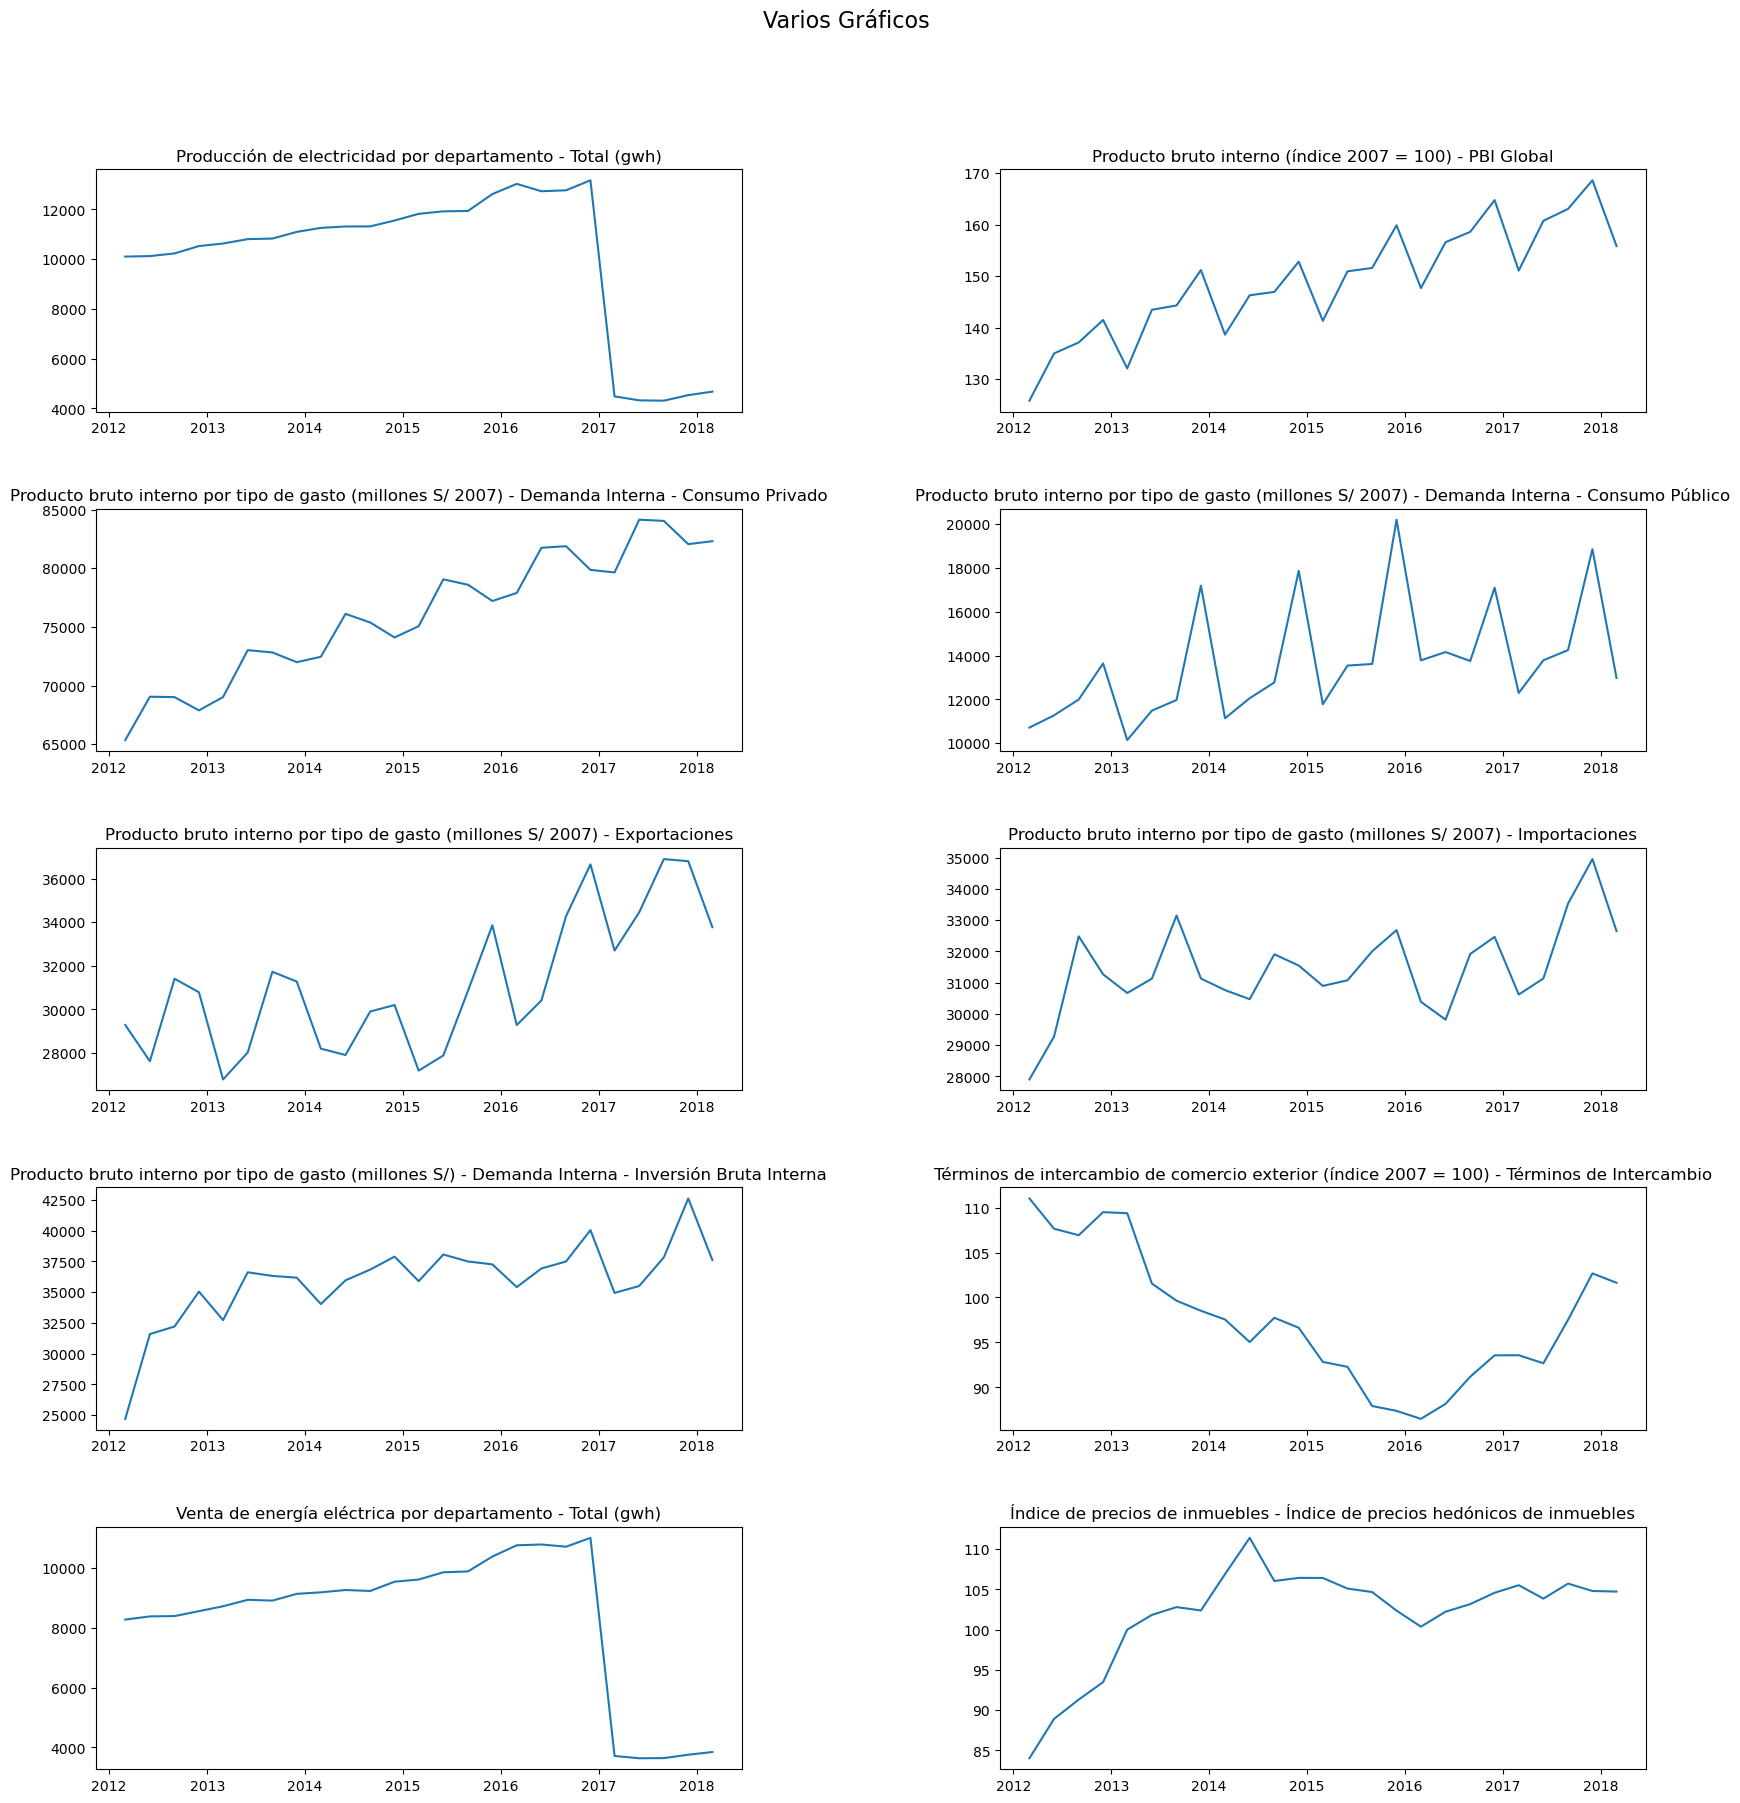

In [11]:
plt.rcParams["figure.figsize"] = (20, 20)

fig, axs = plt.subplots(5, 2)
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

# Obtener todas las columnas excepto 'fecha'
columns = df4.columns.difference(['fecha'])

# Iterar sobre columnas (excluyendo 'fecha')
for idx, i in enumerate(columns):
    a = idx // axs.shape[1]  # índice de fila
    b = idx % axs.shape[1]   # índice de columna

    axs[a, b].set_title(i)
    axs[a, b].plot(df4[i])  # Corregir la función plot aquí

# Título superior del gráfico principal
fig.suptitle('Varios Gráficos', fontsize=16)
plt.show()

##  Ejercicio 6

In [12]:
#Importamos las librerias
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import matplotlib.pyplot as plt

import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from ISLP import load_data
from ISLP.models import (ModelSpec as MS,summarize,poly)

In [13]:
#cargamos las base de datos
df = pd.read_csv("AsientoBebe.csv")
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [14]:
#necesitamos convertir las categoricas a dummys
df = pd.get_dummies(df, columns = ['Urban', 'US'])
df = df.drop(['Urban_No','US_No'], axis=1)
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,Bad,42,17,1,1
1,11.22,111,48,16,260,83,Good,65,10,1,1
2,10.06,113,35,10,269,80,Medium,59,12,1,1
3,7.40,117,100,4,466,97,Medium,55,14,1,1
4,4.15,141,64,3,340,128,Bad,38,13,1,0


1)

In [15]:
#Creamos X:
X = df[['Price','Urban_Yes','US_Yes']]
X.insert(0, "Ones", 1)
X.head()

,Ones,Price,Urban_Yes,US_Yes
0,1,120,1,1
1,1,83,1,1
2,1,80,1,1
3,1,97,1,1
4,1,128,1,0


In [16]:
#Creamos Y:
y = df['Sales']
y.head()

0     9.50
1    11.22
2    10.06
3     7.40
4     4.15
Name: Sales, dtype: float64

In [17]:
#Estimamos 
model = sm.OLS(y, X.astype(float))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Mon, 22 Jan 2024   Prob (F-statistic):           2.39e-23
Time:                        18:59:40   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Ones          13.0435      0.651     20.036      0.000      11.764      14.323
Price         -0.0545      0.005    -10.389      0.000      -0.065      -0.044
Urban_Yes     -0.0219      0.272     -0.081      0.936      -0.556       0.512
US_Yes         1.2006      0.259      4.635      0.000       0.691       1.710
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.758
Skew:                           0.093   Prob(JB):                        0.684
Kurtosis:                       2.897   Cond. No.                         628.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

2. Los coeficientes obtenidos ofrecen las siguientes interpretaciones:

    El intercepto es 13.04, indicando que el nivel de ventas "base" es de 13 asientos.

    Se observa un efecto negativo del precio de los asientos sobre las ventas. Un incremento de un dólar conlleva a una reducción de 0.05 productos vendidos.

    El efecto de que la localidad sea urbana sobre las ventas es negativo, aunque no es estadísticamente significativo

    La ubicación en los Estados Unidos tiene un impacto positivo en las ventas. Concretamente, se traduce en un aumento promedio de 1.2 asientos vendidos.

3. Se puede rechazar la hipotesis nula de H0 para el intercepto, el precio y la dummy de Estados Unidos

4.

In [18]:
X2 = df[['Price','US_Yes']]
X2.insert(0, "Ones", 1)

model = sm.OLS(y, X2.astype(float))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Mon, 22 Jan 2024   Prob (F-statistic):           2.66e-24
Time:                        18:59:40   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Ones          13.0308      0.631     20.652      0.000      11.790      14.271
Price         -0.0545      0.005    -10.416      0.000      -0.065      -0.044
US_Yes         1.1996      0.258      4.641      0.000       0.692       1.708
==============================================================================
Omnibus:                        0.666   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.717   Jarque-Bera (JB):                0.749
Skew:                           0.092   Prob(JB):                        0.688
Kurtosis:                       2.895   Cond. No.                         607.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

5. Guiándonos del R cuadrado ajustado, el modelo que mejor ajusta a los datos es el segundo

6.

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=100, test_size=0.25, shuffle=True) 
X2_train, X2_test, y_train, y_test = train_test_split(X2,y, random_state=100, test_size=0.25, shuffle=True) 

In [20]:
for i in [X_train,X_test,X2_train,X2_test]:
  i = i.astype(float)

In [26]:
#Para el primer modelo:
model = sm.OLS(y_train, X_train)
results = model.fit()

#predicciones:
train_predictions = results.get_prediction(X_train)
y_train_pred = train_predictions.predicted_mean

test_predictions = results.get_prediction(X_test)
y_test_pred = test_predictions.predicted_mean

#MSE:
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

In [27]:
#Para el segundo modelo:
model2 = sm.OLS(y_train, X2_train)
results2 = model2.fit()

#predicciones:
train2_predictions = results2.get_prediction(X2_train)
y2_train_pred = train2_predictions.predicted_mean

test2_predictions = results2.get_prediction(X2_test)
y2_test_pred = test2_predictions.predicted_mean

#MSE:
mse2_train = mean_squared_error(y_train, y2_train_pred)
mse2_test = mean_squared_error(y_test, y2_test_pred)

In [28]:
print('===Primer Modelo===')
print(f'MSE en el conjunto de entrenamiento: {mse_train:.3f}')
print(f'MSE en el conjunto de prueba: {mse_test:.3f}')
print("\n")
print('===Segundo Modelo===')
print(f'MSE en el conjunto de entrenamiento: {mse2_train:.3f}')
print(f'MSE en el conjunto de prueba: {mse2_test:.3f}')

===Primer Modelo===
MSE en el conjunto de entrenamiento: 6.232
MSE en el conjunto de prueba: 5.614


===Segundo Modelo===
MSE en el conjunto de entrenamiento: 6.241
MSE en el conjunto de prueba: 5.545


Guiándonos por el MSE del conjunto de prueba, escogemos el segundo modelo, pues tiene el menor valor